<a href="https://colab.research.google.com/github/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/projeto_modulo1_alura_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taxa de mortalidade por mês/ano no Brasil observado por unidade da Federação.



Neste projeto iremos tentar compreender a partir de uma fotografia do Sistema Único de Saúde (SUS) algumas questões sobre a taxa de mortalidade a partir do local de internação informado no Sistema de Informação Hospitalares/SUS.

A Database foi coletada do sistema TABNET do DATASUS no seguinte link:
http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Verificar esse link: https://duckduckgo.com/?q=a+taxa+de+mortalidade+%C3%A9+medida+em+que%3F&t=brave&ia=web

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
taxa_mort = pd.read_csv('/content/A191112189_28_143_208.csv', sep=';', encoding='latin1', decimal=',',skiprows=3, skipfooter=11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [52]:
taxa_mort.head()

,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,2008,1.35,2.17,1.80,1.55,1.48,2.23,2.41,1.17,1.73,2.65,2.50,2.84,3.24,1.90,2.29,2.22,3.94,3.03,4.49,4.58,3.24,3.50,4.27,2.83,2.56,2.03,2.96,3.28
1,..Janeiro/2008,1.38,1.44,1.60,1.56,1.41,2.72,2.12,0.94,1.41,1.84,2.06,2.62,2.61,1.57,0.96,1.91,3.33,2.44,3.25,3.80,2.62,3.37,3.39,2.23,2.07,2.13,4.45,2.70
2,..Fevereiro/2008,1.36,3.06,1.91,1.16,1.40,3.06,2.75,1.25,1.77,2.58,1.86,2.98,2.71,1.83,1.92,2.31,3.78,2.50,3.83,4.40,3.39,3.67,4.24,3.11,2.66,2.19,3.34,3.17
3,..Março/2008,1.04,2.01,2.11,1.27,1.53,1.86,2.67,1.17,1.83,2.70,2.64,2.70,2.79,1.89,2.82,1.96,3.88,2.82,4.32,4.43,3.08,3.52,4.19,2.55,2.39,1.85,2.75,3.18
4,..Abril/2008,1.00,2.76,2.20,1.93,1.27,2.26,2.39,1.18,1.46,2.79,2.42,2.84,3.81,1.92,2.47,1.97,3.66,3.24,4.32,4.37,3.12,3.51,4.00,2.39,2.87,2.15,3.27,3.18


In [53]:
taxa_mort.tail()

,Ano/mês processamento,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
169,2021,6.33,4.72,9.95,8.20,3.73,4.72,4.39,4.49,4.38,5.40,5.44,7.84,6.67,5.76,6.38,5.47,7.01,6.36,9.92,7.75,7.04,7.03,8.53,6.29,5.57,6.33,4.23,6.89
170,Janeiro/2021,5.39,3.65,9.16,6.02,3.18,3.83,4.05,3.39,3.85,4.73,4.95,7.64,6.83,5.50,5.79,5.24,6.70,6.53,9.92,7.09,6.36,6.10,7.50,6.41,4.71,5.46,3.69,6.33
171,Fevereiro/2021,5.15,5.40,9.36,9.75,3.60,4.11,0.99,3.90,4.53,4.88,5.76,7.33,6.34,5.14,6.96,5.41,6.42,5.71,9.35,7.08,6.33,6.34,7.18,5.63,4.90,5.58,3.64,6.32
172,Março/2021,8.69,5.17,11.33,8.76,4.61,6.10,6.15,6.28,4.87,6.64,5.71,8.56,6.83,6.65,6.34,5.75,7.88,6.81,10.42,9.08,8.44,8.66,10.95,6.87,7.33,8.17,5.23,8.02
173,Total,2.67,2.92,2.89,2.68,2.15,2.72,2.86,2.11,2.64,3.53,3.59,4.23,4.12,3.59,4.19,3.27,4.53,3.72,6.35,5.04,3.88,4.13,4.96,3.73,3.48,3.12,3.16,4.11


Depois de olhar o topo e o fim, sempre olho algumas informações iniciais sobre o Dataframe: 

- Informações sobre colunas, linhas e valores nulos com o .info();

- Informações estatísticas básicas com o .describe().

In [54]:
taxa_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ano/mês processamento  174 non-null    object 
 1   RO                     174 non-null    float64
 2   AC                     174 non-null    object 
 3   AM                     174 non-null    float64
 4   RR                     174 non-null    float64
 5   PA                     174 non-null    float64
 6   AP                     174 non-null    float64
 7   TO                     174 non-null    float64
 8   MA                     174 non-null    float64
 9   PI                     174 non-null    float64
 10  CE                     174 non-null    float64
 11  RN                     174 non-null    float64
 12  PB                     174 non-null    float64
 13  PE                     174 non-null    float64
 14  AL                     174 non-null    float64
 15  SE    

O describe nos dá como falei, informações estatísticas iniciais; contagem de linhas, média, standard deviation (desvio-padrão) e os quartis.

In [55]:
taxa_mort.describe()

,RO,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2.651034,2.866207,2.610000,2.195517,2.747529,2.947241,2.108908,2.687414,3.552356,3.602816,4.351897,4.139483,3.637414,4.191724,3.324770,4.542759,3.712356,6.346149,5.065230,3.906322,4.137471,4.984828,3.747874,3.497299,3.184483,3.162184,4.132356
std,0.990370,1.538661,1.345655,0.665280,0.961691,0.718125,0.855940,0.765181,0.795039,0.729585,1.127973,0.888371,0.927555,1.306626,0.806174,0.602068,0.774350,1.272983,0.744032,0.705826,0.663456,0.838168,0.734694,0.692305,0.929171,0.532706,0.762499
min,1.000000,1.240000,1.090000,1.270000,1.460000,0.990000,0.810000,1.340000,1.840000,1.860000,2.530000,2.610000,1.570000,0.960000,1.900000,3.330000,2.440000,3.250000,3.800000,2.620000,3.240000,3.390000,2.230000,1.950000,1.850000,2.340000,2.700000
25%,2.142500,2.092500,1.907500,1.800000,2.262500,2.482500,1.457500,2.082500,2.985000,3.152500,3.645000,3.530000,3.142500,3.295000,2.717500,4.242500,3.322500,5.695000,4.710000,3.580000,3.832500,4.552500,3.395000,3.205000,2.652500,2.840000,3.710000
50%,2.650000,2.485000,2.380000,2.125000,2.580000,2.830000,2.105000,2.755000,3.385000,3.590000,4.215000,4.045000,3.700000,4.120000,3.310000,4.450000,3.545000,6.350000,4.910000,3.800000,4.020000,4.810000,3.615000,3.455000,3.110000,3.105000,4.050000
75%,3.025000,3.117500,2.847500,2.390000,2.917500,3.250000,2.410000,3.057500,3.877500,3.930000,4.807500,4.387500,4.125000,5.060000,3.700000,4.647500,3.807500,6.742500,5.107500,4.000000,4.200000,5.160000,3.935000,3.680000,3.440000,3.340000,4.290000
max,8.690000,11.330000,11.520000,6.910000,8.830000,6.150000,6.720000,6.120000,7.390000,6.350000,9.670000,8.530000,6.650000,8.690000,6.300000,7.880000,7.330000,11.010000,9.080000,8.440000,8.660000,10.950000,6.870000,7.330000,8.170000,5.950000,8.020000


Interessante notar que uma olhada rápida nessa tabela, nos dá uma informação que pode ser importante para a distribuição dos dados: a média parece sempre estar um pouco acima da mediana (50%).

##Agora vamos fazer os tratamentos necessários.

Duas primeiras identificações que fazemos é que os dados estão com '..' no começo de alguns meses e que temos os dados dos anos espalhados pela Dataset, vamos tratar isso.

In [56]:
taxa_mort['Ano/mês processamento'] = taxa_mort['Ano/mês processamento'].str.lstrip('..')

In [57]:
taxa_mort['Ano/mês processamento']

0                  2008
1          Janeiro/2008
2        Fevereiro/2008
3            Março/2008
4            Abril/2008
             ...       
169                2021
170        Janeiro/2021
171      Fevereiro/2021
172          Março/2021
173               Total
Name: Ano/mês processamento, Length: 174, dtype: object

In [58]:
taxa_mort.set_index('Ano/mês processamento', inplace=True)

In [59]:
taxa_mort.head(1)

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1.35,2.17,1.8,1.55,1.48,2.23,2.41,1.17,1.73,2.65,2.5,2.84,3.24,1.9,2.29,2.22,3.94,3.03,4.49,4.58,3.24,3.5,4.27,2.83,2.56,2.03,2.96,3.28


In [60]:
anos = taxa_mort.loc[['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020','2021']]
anos

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008,1.35,2.17,1.80,1.55,1.48,2.23,2.41,1.17,1.73,2.65,2.50,2.84,3.24,1.90,2.29,2.22,3.94,3.03,4.49,4.58,3.24,3.50,4.27,2.83,2.56,2.03,2.96,3.28
2009,1.44,2.35,2.02,1.87,1.62,2.21,2.42,1.26,1.79,2.97,2.75,3.37,3.54,2.56,2.80,2.40,4.21,3.25,4.80,4.63,3.47,3.77,4.50,3.18,2.89,2.39,2.75,3.48
2010,2.00,2.71,1.97,2.42,1.71,2.31,2.54,1.33,1.80,2.95,2.95,3.47,3.31,2.68,3.29,2.51,4.29,3.40,5.50,4.77,3.58,3.98,4.62,3.46,3.16,2.51,2.64,3.61
2011,2.22,2.95,2.38,2.10,1.79,2.37,2.38,1.50,2.09,2.96,3.33,3.63,3.49,3.33,3.51,2.76,4.28,3.46,5.69,4.71,3.63,3.96,4.61,3.50,3.32,2.67,3.09,3.71
2012,2.45,2.45,2.42,2.37,1.92,2.65,2.51,1.80,2.46,3.16,3.50,3.88,3.56,3.61,3.60,3.01,4.30,3.33,5.91,4.75,3.60,3.84,4.59,3.53,3.20,2.75,3.04,3.80
2013,2.51,2.49,2.25,1.84,2.02,2.54,2.58,2.01,2.68,3.24,3.30,4.20,3.91,3.71,3.83,3.24,4.35,3.45,6.24,4.85,3.83,3.94,4.81,3.56,3.41,2.85,3.02,3.94
2014,2.61,2.34,2.06,1.94,2.10,2.68,2.67,2.11,2.79,3.25,3.60,4.09,3.99,3.71,3.45,3.24,4.25,3.36,6.27,4.87,3.92,4.00,4.74,3.55,3.47,3.03,3.25,3.97
2015,2.77,3.07,2.42,2.27,2.28,2.82,3.07,2.28,3.08,3.69,3.68,4.15,4.38,4.21,4.35,3.53,4.47,3.70,6.56,5.00,3.99,4.03,4.80,3.68,3.59,3.27,3.32,4.18
2016,3.22,3.09,3.05,2.68,2.41,2.76,3.40,2.44,3.10,3.83,4.13,4.89,4.82,4.27,5.21,3.64,4.63,3.82,6.80,5.16,4.05,4.18,5.15,3.88,3.64,3.44,3.61,4.38


In [61]:
taxa_mort = taxa_mort.drop(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020','2021'])
taxa_mort = taxa_mort.append(anos)
taxa_mort.tail()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,3.11,3.09,3.03,2.66,2.43,2.57,3.25,2.38,2.94,4.04,3.93,4.70,4.35,4.13,4.82,3.69,4.73,3.83,6.65,5.03,3.77,4.13,5.04,3.96,3.64,3.40,3.14,4.29
2018,2.88,3.30,3.13,2.97,2.38,2.69,3.18,2.27,2.89,3.82,3.77,4.72,4.27,3.72,5.08,3.60,4.59,3.73,6.79,5.02,3.80,4.18,5.22,3.89,3.66,3.41,3.09,4.26
2019,2.87,3.46,3.30,3.20,2.39,2.76,3.41,2.41,3.02,3.82,3.99,4.96,4.32,3.86,5.34,3.75,4.64,3.75,6.80,5.04,3.83,4.15,5.19,3.83,3.69,3.63,2.90,4.31
2020,3.85,4.43,5.22,4.21,3.45,4.40,4.45,3.66,4.02,5.19,4.79,6.57,5.78,4.90,6.48,4.91,5.61,5.28,8.91,6.59,5.07,5.20,6.20,5.02,4.57,5.02,3.88,5.63
2021,6.33,4.72,9.95,8.20,3.73,4.72,4.39,4.49,4.38,5.40,5.44,7.84,6.67,5.76,6.38,5.47,7.01,6.36,9.92,7.75,7.04,7.03,8.53,6.29,5.57,6.33,4.23,6.89


In [62]:
taxa_mort

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
Ano/mês processamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Janeiro/2008,1.38,1.44,1.60,1.56,1.41,2.72,2.12,0.94,1.41,1.84,2.06,2.62,2.61,1.57,0.96,1.91,3.33,2.44,3.25,3.80,2.62,3.37,3.39,2.23,2.07,2.13,4.45,2.70
Fevereiro/2008,1.36,3.06,1.91,1.16,1.40,3.06,2.75,1.25,1.77,2.58,1.86,2.98,2.71,1.83,1.92,2.31,3.78,2.50,3.83,4.40,3.39,3.67,4.24,3.11,2.66,2.19,3.34,3.17
Março/2008,1.04,2.01,2.11,1.27,1.53,1.86,2.67,1.17,1.83,2.70,2.64,2.70,2.79,1.89,2.82,1.96,3.88,2.82,4.32,4.43,3.08,3.52,4.19,2.55,2.39,1.85,2.75,3.18
Abril/2008,1.00,2.76,2.20,1.93,1.27,2.26,2.39,1.18,1.46,2.79,2.42,2.84,3.81,1.92,2.47,1.97,3.66,3.24,4.32,4.37,3.12,3.51,4.00,2.39,2.87,2.15,3.27,3.18
Maio/2008,1.20,2.60,1.87,1.28,1.39,2.19,2.01,1.34,1.90,2.61,2.54,2.53,2.74,1.85,1.97,1.90,3.79,2.69,4.94,4.57,3.29,3.33,3.94,3.00,2.29,1.91,2.38,3.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,3.11,3.09,3.03,2.66,2.43,2.57,3.25,2.38,2.94,4.04,3.93,4.70,4.35,4.13,4.82,3.69,4.73,3.83,6.65,5.03,3.77,4.13,5.04,3.96,3.64,3.40,3.14,4.29
2018,2.88,3.30,3.13,2.97,2.38,2.69,3.18,2.27,2.89,3.82,3.77,4.72,4.27,3.72,5.08,3.60,4.59,3.73,6.79,5.02,3.80,4.18,5.22,3.89,3.66,3.41,3.09,4.26
2019,2.87,3.46,3.30,3.20,2.39,2.76,3.41,2.41,3.02,3.82,3.99,4.96,4.32,3.86,5.34,3.75,4.64,3.75,6.80,5.04,3.83,4.15,5.19,3.83,3.69,3.63,2.90,4.31


Lá em cima vimos que a coluna do Acre está classificada como string, vamos transformá-la em float64 como as outras colunas.

In [63]:
taxa_mort['AC'] = taxa_mort['AC'].astype('float64')

ValueError: ignored

Vamos encontrar essa string que não está permitindo a transformação dos dados.

In [65]:
taxa_mort['AC'].unique()

array(['1.44', '3.06', '2.01', '2.76', '2.60', '1.76', '2.34', '2.73',
       '2.28', '1.87', '1.38', '1.60', '3.07', '2.29', '2.23', '2.19',
       '2.30', '1.84', '2.18', '1.92', '...', '2.75', '2.55', '2.57',
       '2.43', '1.91', '2.74', '2.98', '2.49', '2.56', '2.92', '3.21',
       '3.63', '2.46', '3.08', '3.16', '2.95', '2.31', '3.29', '2.47',
       '3.52', '3.15', '3.41', '2.65', '2.52', '1.36', '2.61', '3.05',
       '2.39', '2.41', '1.80', '2.21', '2.33', '3.24', '2.80', '3.20',
       '2.48', '2.53', '2.02', '1.61', '1.53', '1.99', '2.05', '2.25',
       '3.13', '2.72', '2.85', '2.89', '3.64', '1.79', '3.10', '3.00',
       '3.46', '3.66', '3.32', '2.45', '3.38', '3.02', '2.97', '3.23',
       '3.09', '3.27', '3.70', '2.51', '3.86', '3.04', '3.45', '3.98',
       '2.87', '3.68', '1.98', '3.43', '2.22', '3.48', '2.78', '2.64',
       '3.76', '3.25', '2.94', '3.79', '3.62', '4.91', '4.30', '4.11',
       '3.69', '3.95', '3.99', '3.47', '2.50', '3.57', '3.55', '3.67',
       

In [66]:
taxa_mort['AC'].head(25)

Ano/mês processamento
Janeiro/2008      1.44
Fevereiro/2008    3.06
Março/2008        2.01
Abril/2008        2.76
Maio/2008         2.60
Junho/2008        1.76
Julho/2008        2.34
Agosto/2008       2.73
Setembro/2008     2.28
Outubro/2008      1.87
Novembro/2008     1.38
Dezembro/2008     1.60
Janeiro/2009      3.07
Fevereiro/2009    2.29
Março/2009        2.23
Abril/2009        2.19
Maio/2009         2.30
Junho/2009        1.84
Julho/2009        2.18
Agosto/2009       1.92
Setembro/2009      ...
Outubro/2009      2.75
Novembro/2009     2.55
Dezembro/2009     2.57
Janeiro/2010      2.43
Name: AC, dtype: object

In [67]:
mean_ac = taxa_mort.drop('Setembro/2009')
mean_ac['AC'] = mean_ac['AC'].astype('float64')
mean_ac = "%.2f" % (mean_ac.iloc[12:23,1].mean())

In [68]:
taxa_mort = taxa_mort.replace(taxa_mort.loc['Setembro/2009', 'AC'],mean_ac)
taxa_mort.iloc[12:24,1]

Ano/mês processamento
Janeiro/2009      3.07
Fevereiro/2009    2.29
Março/2009        2.23
Abril/2009        2.19
Maio/2009         2.30
Junho/2009        1.84
Julho/2009        2.18
Agosto/2009       1.92
Setembro/2009     2.35
Outubro/2009      2.75
Novembro/2009     2.55
Dezembro/2009     2.57
Name: AC, dtype: object

In [69]:
taxa_mort['AC'] = taxa_mort['AC'].astype('float64')
taxa_mort['AC'].head()

Ano/mês processamento
Janeiro/2008      1.44
Fevereiro/2008    3.06
Março/2008        2.01
Abril/2008        2.76
Maio/2008         2.60
Name: AC, dtype: float64

Como está registrado acima, identificamos um valor nulo porém num padrão não reconhecido pelo Python, como todos os outros dados estavam completos, decidimos substituir o valor pela média daquele ano.

##Problemas tratados podemos seguir em frente com nossa análise.

In [70]:
#retomando o describe()
taxa_mort.describe()

,RO,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2.651034,2.960057,2.866207,2.610000,2.195517,2.747529,2.947241,2.108908,2.687414,3.552356,3.602816,4.351897,4.139483,3.637414,4.191724,3.324770,4.542759,3.712356,6.346149,5.065230,3.906322,4.137471,4.984828,3.747874,3.497299,3.184483,3.162184,4.132356
std,0.990370,0.823474,1.538661,1.345655,0.665280,0.961691,0.718125,0.855940,0.765181,0.795039,0.729585,1.127973,0.888371,0.927555,1.306626,0.806174,0.602068,0.774350,1.272983,0.744032,0.705826,0.663456,0.838168,0.734694,0.692305,0.929171,0.532706,0.762499
min,1.000000,1.360000,1.240000,1.090000,1.270000,1.460000,0.990000,0.810000,1.340000,1.840000,1.860000,2.530000,2.610000,1.570000,0.960000,1.900000,3.330000,2.440000,3.250000,3.800000,2.620000,3.240000,3.390000,2.230000,1.950000,1.850000,2.340000,2.700000
25%,2.142500,2.410000,2.092500,1.907500,1.800000,2.262500,2.482500,1.457500,2.082500,2.985000,3.152500,3.645000,3.530000,3.142500,3.295000,2.717500,4.242500,3.322500,5.695000,4.710000,3.580000,3.832500,4.552500,3.395000,3.205000,2.652500,2.840000,3.710000
50%,2.650000,2.880000,2.485000,2.380000,2.125000,2.580000,2.830000,2.105000,2.755000,3.385000,3.590000,4.215000,4.045000,3.700000,4.120000,3.310000,4.450000,3.545000,6.350000,4.910000,3.800000,4.020000,4.810000,3.615000,3.455000,3.110000,3.105000,4.050000
75%,3.025000,3.425000,3.117500,2.847500,2.390000,2.917500,3.250000,2.410000,3.057500,3.877500,3.930000,4.807500,4.387500,4.125000,5.060000,3.700000,4.647500,3.807500,6.742500,5.107500,4.000000,4.200000,5.160000,3.935000,3.680000,3.440000,3.340000,4.290000
max,8.690000,6.020000,11.330000,11.520000,6.910000,8.830000,6.150000,6.720000,6.120000,7.390000,6.350000,9.670000,8.530000,6.650000,8.690000,6.300000,7.880000,7.330000,11.010000,9.080000,8.440000,8.660000,10.950000,6.870000,7.330000,8.170000,5.950000,8.020000


Agora vamos começar a observar graficamente alguns dados.

Primeiramente vamos observar a mortalidade ao longo do tempo na base por regiões.

In [ ]:
taxa_mort.info()

Mergulhando no controle dos subplots permitido pelo Matplotlib usamos subplots() para gerar diversos gráficos na mesma figure.

Usamos title.set_text que permite adicionar um título em cada um dos subplots para indicar as taxas de cada estado.

usamos sca e xticks para definir os ticks de cada um dos gráficos e finalmente suptitle e tight layout para colocar um título geral e fazer com que nosso gráfico desse uma ajustada automática e também style.use para definir o estilo (função que eu levei mais de 30 minutos para encontrar).

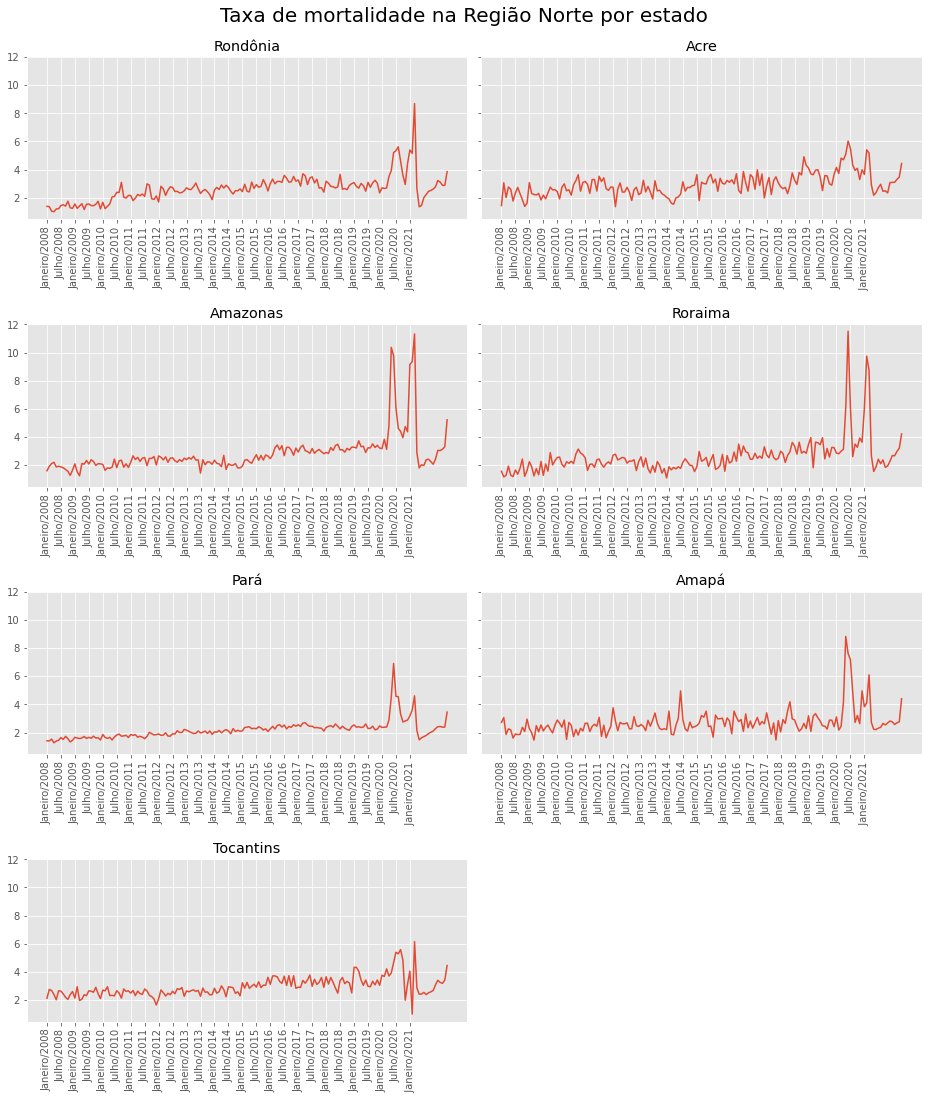

In [205]:
#construindo a figure
fig, axs = plt.subplots(4, 2, figsize=(13,15), sharey=True)
plt.style.use('ggplot')  
axs[0,0].plot(taxa_mort.iloc[0:173,0])
axs[0,1].plot(taxa_mort.iloc[:173,1])
axs[1,0].plot(taxa_mort.iloc[:173,2])
axs[1,1].plot(taxa_mort.iloc[:173,3])
axs[2,0].plot(taxa_mort.iloc[:173,4])
axs[2,1].plot(taxa_mort.iloc[:173,5])
axs[3,0].plot(taxa_mort.iloc[:173,6])

#setando títulos
axs[0,0].title.set_text('Rondônia')
axs[0,1].title.set_text('Acre')
axs[1,0].title.set_text('Amazonas')
axs[1,1].title.set_text('Roraima')
axs[2,0].title.set_text('Pará')
axs[2,1].title.set_text('Amapá')
axs[3,0].title.set_text('Tocantins')

#setando xticks
plt.sca(axs[0, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[0, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[2, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[2, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[3, 0])
plt.xticks(np.arange(0,160,6), rotation=90)

fig.suptitle('Taxa de mortalidade na Região Norte por estado', x=0.5, y=1.02, fontsize=20)
fig.delaxes(axs[3,1])
fig.tight_layout()
plt.show()

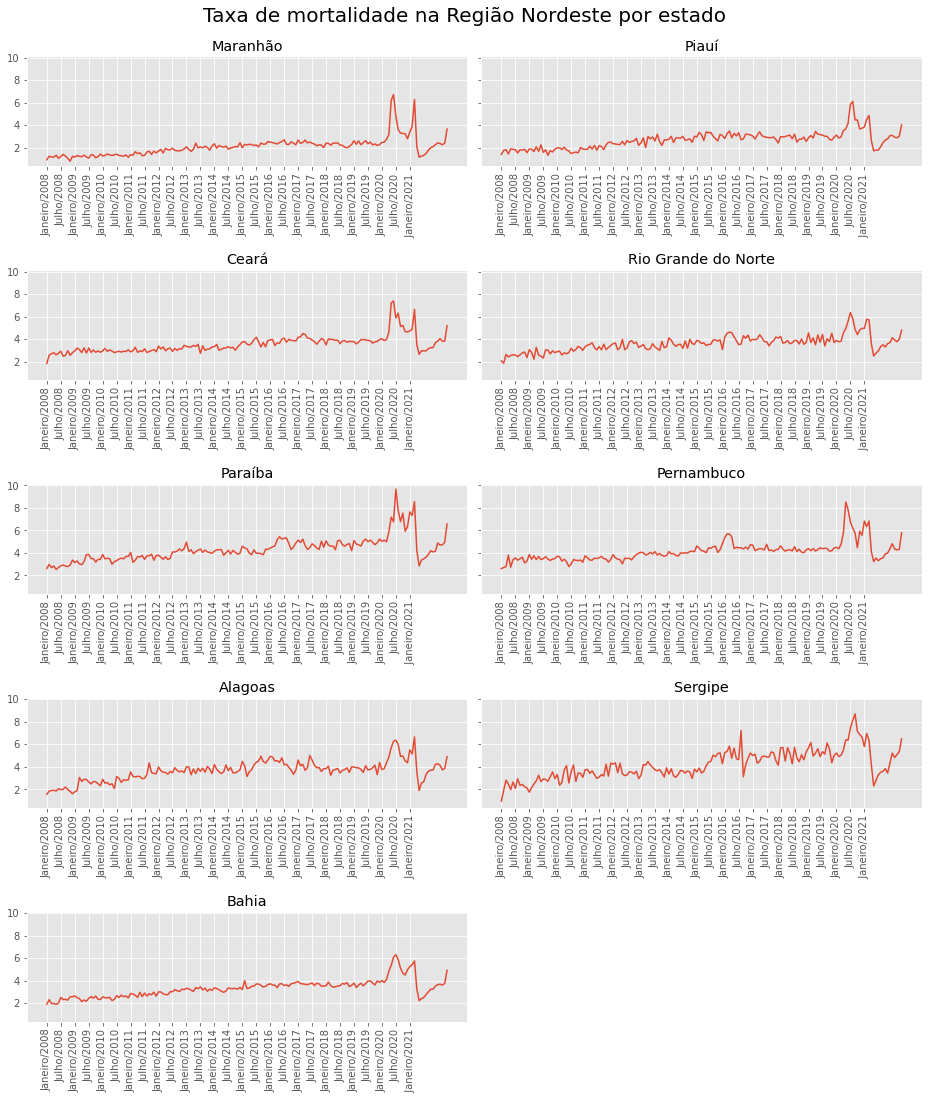

In [206]:
#construindo a figure
fig, axs = plt.subplots(5, 2, figsize=(13,15), sharey=True)
plt.style.use('ggplot')  
axs[0,0].plot(taxa_mort.iloc[0:173,7])
axs[0,1].plot(taxa_mort.iloc[:173,8])
axs[1,0].plot(taxa_mort.iloc[:173,9])
axs[1,1].plot(taxa_mort.iloc[:173,10])
axs[2,0].plot(taxa_mort.iloc[:173,11])
axs[2,1].plot(taxa_mort.iloc[:173,12])
axs[3,0].plot(taxa_mort.iloc[:173,13])
axs[3,1].plot(taxa_mort.iloc[:173,14])
axs[4,0].plot(taxa_mort.iloc[:173,15])

#setando títulos
axs[0,0].title.set_text('Maranhão')
axs[0,1].title.set_text('Piauí')
axs[1,0].title.set_text('Ceará')
axs[1,1].title.set_text('Rio Grande do Norte')
axs[2,0].title.set_text('Paraíba')
axs[2,1].title.set_text('Pernambuco')
axs[3,0].title.set_text('Alagoas')
axs[3,1].title.set_text('Sergipe')
axs[4,0].title.set_text('Bahia')

#setando xticks
plt.sca(axs[0, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[0, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[2, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[2, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[3, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[3, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[4, 0])
plt.xticks(np.arange(0,160,6), rotation=90)

fig.suptitle('Taxa de mortalidade na Região Nordeste por estado', x=0.5, y=1.02, fontsize=20)
fig.delaxes(axs[4,1])
fig.tight_layout()
plt.show()

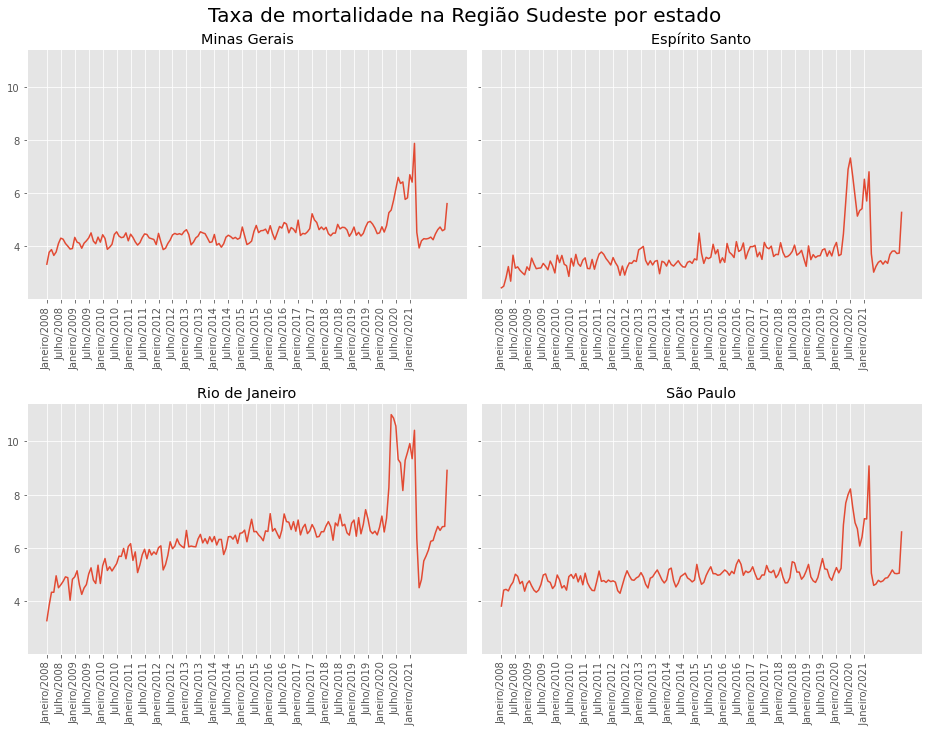

In [208]:
#construindo a figure
fig, axs = plt.subplots(2, 2, figsize=(13,10), sharey=True)
plt.style.use('ggplot')  
axs[0,0].plot(taxa_mort.iloc[0:173,16])
axs[0,1].plot(taxa_mort.iloc[:173,17])
axs[1,0].plot(taxa_mort.iloc[:173,18])
axs[1,1].plot(taxa_mort.iloc[:173,19])

#setando títulos
axs[0,0].title.set_text('Minas Gerais')
axs[0,1].title.set_text('Espírito Santo')
axs[1,0].title.set_text('Rio de Janeiro')
axs[1,1].title.set_text('São Paulo')

#setando xticks
plt.sca(axs[0, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[0, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 1])
plt.xticks(np.arange(0,160,6), rotation=90)


fig.suptitle('Taxa de mortalidade na Região Sudeste por estado', x=0.5, y=1.02, fontsize=20)
fig.tight_layout()
plt.show()

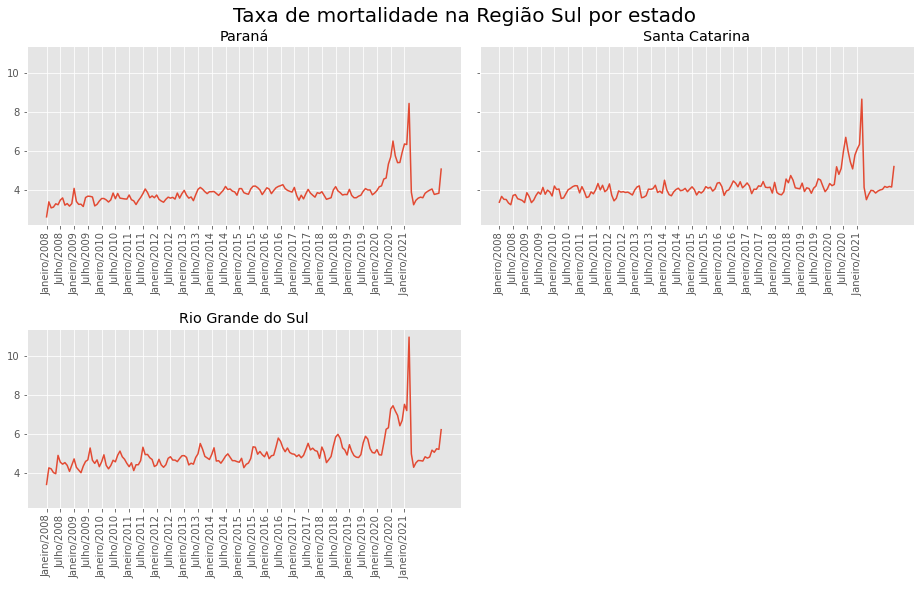

In [210]:
#construindo a figure
fig, axs = plt.subplots(2, 2, figsize=(13,8), sharey=True)
plt.style.use('ggplot')  
axs[0,0].plot(taxa_mort.iloc[0:173,20])
axs[0,1].plot(taxa_mort.iloc[:173,21])
axs[1,0].plot(taxa_mort.iloc[:173,22])

#setando títulos
axs[0,0].title.set_text('Paraná')
axs[0,1].title.set_text('Santa Catarina')
axs[1,0].title.set_text('Rio Grande do Sul')

#setando xticks
plt.sca(axs[0, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[0, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 0])
plt.xticks(np.arange(0,160,6), rotation=90)

fig.suptitle('Taxa de mortalidade na Região Sul por estado', x=0.5, y=1.02, fontsize=20)
fig.tight_layout()
fig.delaxes(axs[1,1])
plt.show()

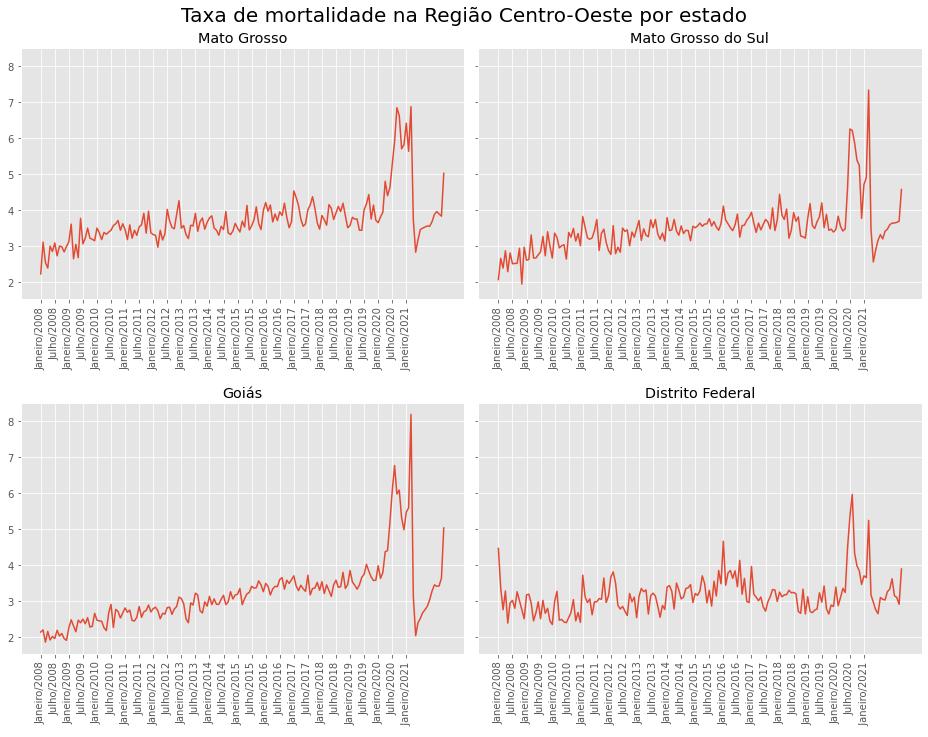

In [212]:
#construindo a figure
fig, axs = plt.subplots(2, 2, figsize=(13,10), sharey=True)
plt.style.use('ggplot')  
axs[0,0].plot(taxa_mort.iloc[0:173,23])
axs[0,1].plot(taxa_mort.iloc[:173,24])
axs[1,0].plot(taxa_mort.iloc[:173,25])
axs[1,1].plot(taxa_mort.iloc[:173,26])

#setando títulos
axs[0,0].title.set_text('Mato Grosso')
axs[0,1].title.set_text('Mato Grosso do Sul')
axs[1,0].title.set_text('Goiás')
axs[1,1].title.set_text('Distrito Federal')

#setando xticks
plt.sca(axs[0, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[0, 1])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 0])
plt.xticks(np.arange(0,160,6), rotation=90)
plt.sca(axs[1, 1])
plt.xticks(np.arange(0,160,6), rotation=90)


fig.suptitle('Taxa de mortalidade na Região Centro-Oeste por estado', x=0.5, y=1.02, fontsize=20)
fig.tight_layout()
plt.show()

Fora alguns picos isolados em anos anteriores, todos os estados tem picos padrões a partir de 2020 devido à pandemia de Coronavírus que sobrecarregou o sistema de saúde e que por consequência aumentou a taxa de mortalidade no sistema.

Outra coisa que podemos intuir dos gráficos é que em muitos estados a taxa de mortalidade no sistema hospitalar vinha subindo de maneira consistente, alguns casos: Goiás, Rio de Janeiro, Sergipe, Roraima e Amazonas.

##Agora vamos comparar a distribuição da taxa de mortalidade em dois estados parecidos São Paulo e Minas Gerais.

In [240]:
mean_sp = "%.2f" % (taxa_mort['SP'].mean())
std_sp = "%.2f" % (taxa_mort['SP'].std())
med_sp = "%.2f" % (taxa_mort['SP'].median())

In [246]:
mean_mg = "%.2f" % (taxa_mort['MG'].mean())
std_mg = "%.2f" % (taxa_mort['MG'].std())
med_mg = "%.2f" % (taxa_mort['MG'].median())

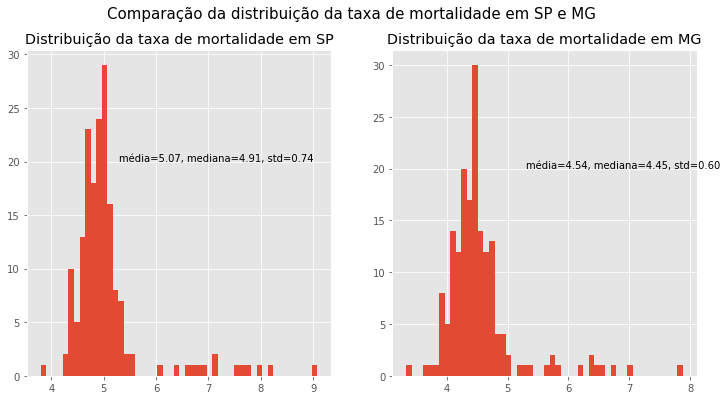

In [257]:
#montando a figura
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(taxa_mort['SP'], bins=50)
ax[1].hist(taxa_mort['MG'], bins=50)

#setando títulos
ax[0].title.set_text("""Distribuição da taxa de mortalidade em SP"""
                    )
ax[1].title.set_text('Distribuição da taxa de mortalidade em MG')

#setando textos
ax[0].text(5.3,20, f'média={mean_sp}, mediana={med_sp}, std={std_sp}')
ax[1].text(5.3,20, f'média={mean_mg}, mediana={med_mg}, std={std_mg}')

fig.suptitle('Comparação da distribuição da taxa de mortalidade em SP e MG', fontsize=15)
plt.show()

Observando essa distribuição vemos que apesar de Minas Gerais ter metade da população de São Paulo, a taxa de mortalidade média no estado fica pouco abaixo, o que pode indicar uma saúde de pior qualidade no estado. 

Fontes: https://www.ibge.gov.br/

#Depois de observarmos as principais formas de tratamento inicial e análise inicial dos dados, podemos concluir que muitas vezes as bases não virão das formas que desejamos e precisamos ser criativos e utilizar o poder das bibliotecas para realizar os procedimentos.

#Sobre nossos dados em si, podemos observar que a taxa de mortalidade sobe muito com a pandemia, mas que no geral as taxas de mortalidade no SUS são baixas, o que indica um sistema relativamente bom, apesar dos problemas conhecidos de verbas e de gestão.

#Alguns problemas do projeto foram a necessidade de muitas funções na hora da criação dos gráficos por exemplo, que com a biblioteca Seaborn poderia ter sido mais rápido, como limitação acerca dos dados poderiam ser aplicados mais métodos estatísticos para tentar encontrar mais correlações nos dados, o projeto ficou meramente descritivo. Em outra oportunidade poderia-se incluir a base de gastos do Sistema de Informações Hospitalar para correlacionar se maior gasto = menor taxa de mortalide ou não (seria muito interessante).